In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]

In [37]:
def gumbel_pdf(x, mu = 0.0, sigma = 1.0, gamma = 1.0):
    z = np.divide(np.subtract(x, mu), sigma)
    w = - np.square(z) * np.power(np.subtract(1.0, np.exp(-np.square(z))), gamma)
    return np.exp(w)

def ReLU(x):
    return x * (x > 0)

def frechet_pdf(x, alpha = 13.0, s = 1.7):
    delta = ReLU(x)
    z = np.divide(delta, s) + np.power(np.divide(alpha, 1.0 + alpha), np.divide(1.0, alpha))
    w1 = np.power(np.divide(np.multiply(alpha, z), np.square(s)), -1.0 - alpha)
    w2 = np.exp(-np.power(np.divide(z, s), -alpha))
    return w1 * w2


In [38]:
from scipy import integrate

gumbel_const = integrate.quad(gumbel_pdf, -np.inf, np.inf)[0]
frechet_const = integrate.quad(frechet_pdf, 0, np.inf)[0]

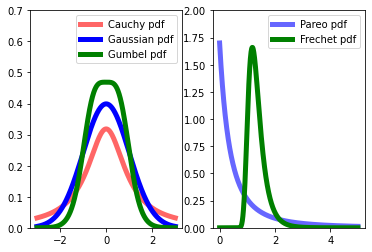

In [47]:
x = np.linspace(-3, 3, 1000)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x, stats.cauchy.pdf(x), "r-", lw = 5, alpha = .6, label = "Cauchy pdf")
ax1.plot(x, stats.norm.pdf(x), "b-", lw = 5, label = "Gaussian pdf")
ax1.plot(x, gumbel_pdf(x) / gumbel_const, "g-", lw = 5, label = "Gumbel pdf")
ax1.set_ylim(0, 0.7)
ax1.legend()

x = np.linspace(0, 5, 1000)
ax2.plot(x, stats.pareto.pdf(x + 1, b = 1.7), "b-", lw = 5, alpha = .6, label = "Pareo pdf")
ax2.plot(x, frechet_pdf(x) / frechet_const, "g-", lw = 5, label = "Frechet pdf")
ax2.set_ylim(0, 2)
ax2.legend()

plt.show()